In [1]:
import pandas as pd

# Load the CSV
df = pd.read_csv("glassdoor_cleaned_new.csv")



In [2]:
df

,Job Title,Location,Rating,monthly,min_salary_rupees,max_salary_rupees,avg_salary_rupees,company_name_cleaned,Standardized Title
0,Data Scientist,Bhubaneshwar,4.3,0,1000000,2300000,1650000.0,Nirmalya Labs,Data Scientist
1,AI Operations and Optimization Manager,Pune,3.7,0,500000,600000,550000.0,Ecolab Inc.,AI Engineer
2,"Data Scientist II, Last Mile Science",Bengaluru,3.6,0,500000,1000000,750000.0,ADCI - Karnataka,Data Scientist
3,Senior Data Scientist,Gurgaon,4.0,0,700000,900000,800000.0,Gartner,Data Scientist
4,Data Scientist,Hyderābād,3.9,0,500000,1000000,750000.0,"World Wide Technology Holding, LLC",Data Scientist
...,...,...,...,...,...,...,...,...,...
787,Frontend React Developer (Lead),Bengaluru,3.7,0,600000,1000000,800000.0,Infogain,Frontend Developer
788,Frontend Developer (React),Chennai,3.8,0,600000,900000,750000.0,Ideas2IT Technologies,Frontend Developer
789,ReactJS Developer,India,4.5,0,200000,700000,450000.0,LoreMine Technologies Pvt Ltd,Frontend Developer
790,Junior Front End Developer,Mohali,4.9,1,15000,25000,20000.0,Primotech,Frontend Developer


In [3]:
df.shape

(792, 9)

In [4]:
df.describe()

,Rating,monthly,min_salary_rupees,max_salary_rupees,avg_salary_rupees
count,733.000000,792.000000,7.920000e+02,7.920000e+02,7.920000e+02
mean,3.862074,0.085859,5.338687e+05,8.347033e+05,6.842860e+05
std,0.613938,0.280332,7.400326e+05,7.624247e+05,6.885511e+05
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.600000,0.000000,3.000000e+05,6.000000e+05,4.500000e+05
50%,3.900000,0.000000,4.000000e+05,8.000000e+05,6.000000e+05
75%,4.200000,0.000000,6.000000e+05,9.000000e+05,7.500000e+05
max,5.000000,1.000000,9.700000e+06,9.000000e+06,8.000000e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job Title             792 non-null    object 
 1   Location              779 non-null    object 
 2   Rating                733 non-null    float64
 3   monthly               792 non-null    int64  
 4   min_salary_rupees     792 non-null    int64  
 5   max_salary_rupees     792 non-null    int64  
 6   avg_salary_rupees     792 non-null    float64
 7   company_name_cleaned  792 non-null    object 
 8   Standardized Title    792 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 55.8+ KB


In [6]:
missing = df.isnull().sum()
print(missing[missing > 0])


Location    13
Rating      59
dtype: int64


In [7]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [8]:
print(df['Location'].value_counts().head(10))

Location
Bengaluru    277
Hyderābād     73
Pune          63
Chennai       59
Remote        45
India         43
Gurgaon       43
Noida         30
Mumbai        29
Mohali        22
Name: count, dtype: int64


In [9]:
print(df['company_name_cleaned'].value_counts().head(10))

company_name_cleaned
Optum            13
Qualcomm          9
Google            9
EY                9
Visa              8
Wipro Limited     7
Target            6
Apple             6
Microsoft         6
Citigroup         5
Name: count, dtype: int64


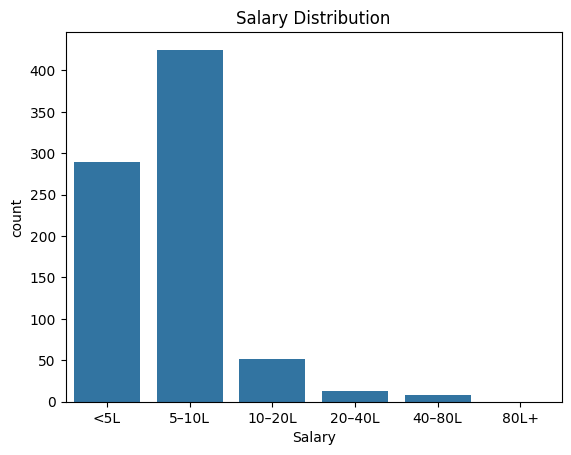

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
bins = [0, 500000, 1000000, 2000000, 4000000, 8000000, 20000000]
labels = ['<5L', '5–10L', '10–20L', '20–40L', '40–80L', '80L+']
df['Salary'] = pd.cut(df['avg_salary_rupees'], bins=bins, labels=labels)

sns.countplot(x='Salary', data=df, order=labels)
plt.title("Salary Distribution")
plt.show()


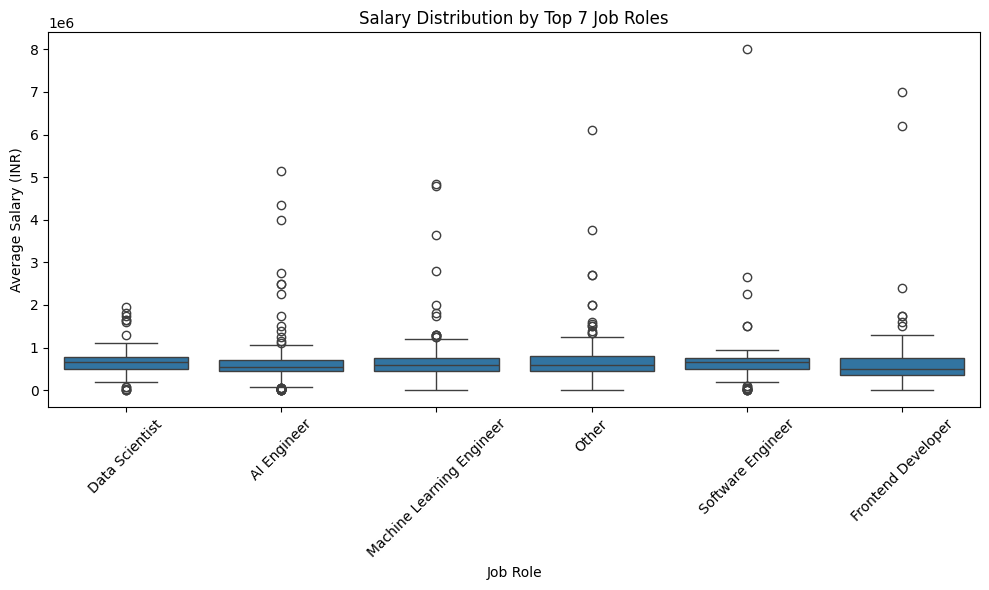

In [11]:
top_roles = df['Standardized Title'].value_counts().nlargest(7).index

# Filter DataFrame to include only those roles
top_df = df[df['Standardized Title'].isin(top_roles)]

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Standardized Title', y='avg_salary_rupees', data=top_df)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Top 7 Job Roles")
plt.ylabel("Average Salary (INR)")
plt.xlabel("Job Role")
plt.tight_layout()
plt.show()

In [12]:
# import matplotlib.ticker as mtick

# plt.figure(figsize=(10, 6))
# sns.histplot(df_valid['avg_salary_rupees'], bins=30, kde=True, color='skyblue')

# plt.title("Distribution of Average Salary (Rupees)", fontsize=14)
# plt.xlabel("Average Salary (INR)", fontsize=12)
# plt.ylabel("Frequency", fontsize=12)

# formatter = mtick.FuncFormatter(lambda x, _: f"{int(x):,}")
# plt.gca().xaxis.set_major_formatter(formatter)

# plt.grid(True)
# plt.tight_layout()
# plt.show()


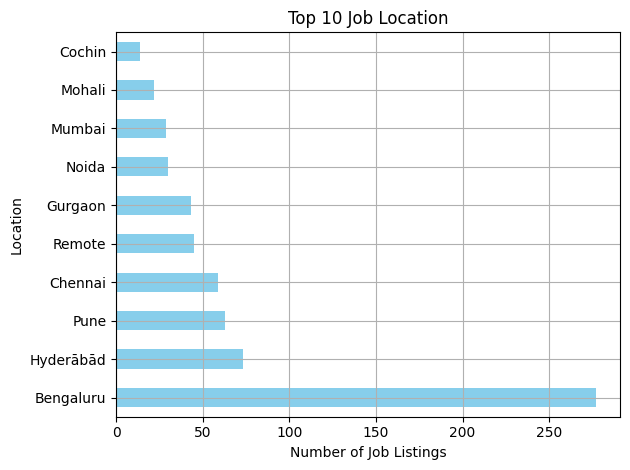

In [13]:

filtered_df = df[df['Location'].str.strip().str.lower() != 'india']


top_locs = filtered_df['Location'].value_counts().head(10)

top_locs.plot(kind='barh', color='skyblue')
plt.title("Top 10 Job Location")
plt.xlabel("Number of Job Listings")
plt.ylabel("Location")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# df.to_csv("glassdoor_cleaned_new_final.csv", index=False)
